In [2]:
import pandas as pd 
import numpy as np
import keras
import math 
import random 

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

2023-04-27 14:29:53.297349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 14:29:53.436860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 14:29:53.436886: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 14:29:54.153689: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
df = pd.read_csv("TSLA-d.csv", index_col=0)
df.pop("Volume")
df["Range"] = (df["High"] - df["Low"]) / df["Open"]
df.pop("Open")
df.pop("High")
df.pop("Low")
df['Change'] = df["Adj Close"].pct_change()
df = df. tail(-1) 
df.pop("Close")

df.head()

,Adj Close,Range,Change
Date,,,
2010-06-30,1.588667,0.276076,-0.002512
2010-07-01,1.464000,0.226000,-0.078473
2010-07-02,1.280000,0.190870,-0.125683
2010-07-06,1.074000,0.208500,-0.160937
2010-07-07,1.053333,0.100610,-0.019243


In [4]:
# REMOVE INDEX COL
df = pd.DataFrame(df.values, columns=['Adj Close', 'Range', 'Change'])
df.head()

,Adj Close,Range,Change
0,1.588667,0.276076,-0.002512
1,1.464000,0.226000,-0.078473
2,1.280000,0.190870,-0.125683
3,1.074000,0.208500,-0.160937
4,1.053333,0.100610,-0.019243


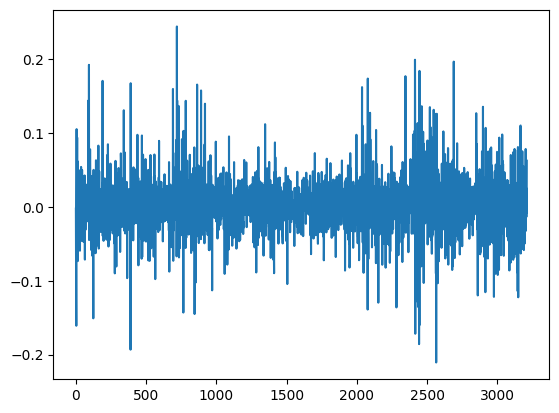

In [5]:
# PLOT CHANGE BEFORE
plt.plot(df['Change'])

In [6]:
# FUNCTION TO HANDLE OUTLIERS 
def squash_col_outliers(
    df: pd.DataFrame, 
    col_name: str, 
    min_quantile: float =0.01, 
    max_quantile:float =0.99
): 
    q_lo = df[col_name].quantile(min_quantile)
    q_hi  = df[col_name].quantile(max_quantile)
    
    df.loc[df[col_name] >= q_hi, col_name] = q_hi
    df.loc[df[col_name] <= q_lo, col_name] = q_lo
    return df

In [24]:
# OUTLIERS IN CHANGE 
df = squash_col_outliers(df, 'Change')

In [25]:
# SHOW NEW MIN & MAX
print(df['Change'].max())
print(df['Change'].min())

0.10999024964609014
-0.09005126578365338


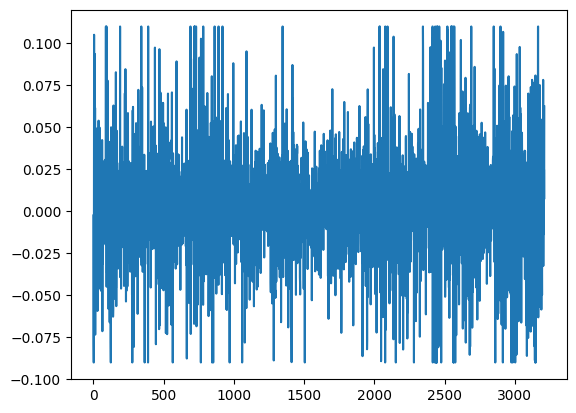

In [26]:
# PLOT CLEANSED CHANGE 
plt.plot(df['Change'])

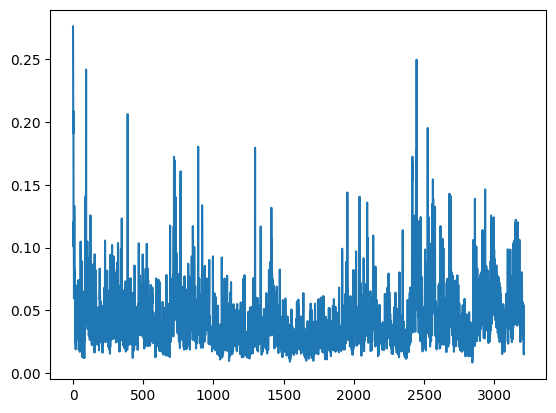

In [27]:
# PLOT RANGE BEFORE 
plt.plot(df['Range'])

In [28]:
# OUTLIERS IN CHANGE 
df = squash_col_outliers(df, "Range", min_quantile=0.0, max_quantile=0.97)

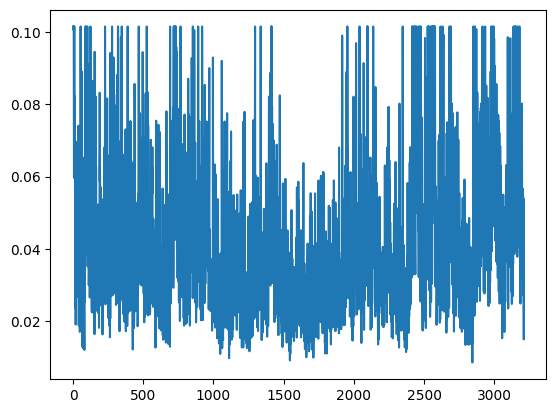

In [29]:
# PLOT RANGE AFTER 
plt.plot(df['Range'])